In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
x_data = np.linspace(0,10,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
noise

array([ 0.64061449,  0.80009241,  0.43086269, ...,  0.00958741,
        0.07655434,  2.52104237])

y = mx + b

b =5

In [5]:
y_true = ( 0.5 * x_data ) + 5 + noise      #  to randomize 

In [6]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [7]:
y_df.head()

,Y
0,5.640614
1,5.800097
2,5.430873
3,4.089154
4,5.487359


In [8]:
my_data = pd.concat([x_df,y_df], axis = 1)   # add two columns

In [9]:
my_data.head()

,X Data,Y
0,0.00000,5.640614
1,0.00001,5.800097
2,0.00002,5.430873
3,0.00003,4.089154
4,0.00004,5.487359


In [10]:
my_data.sample(n=250)  #can't p;ot million rows


,X Data,Y
34071,0.340710,5.221225
543482,5.434825,8.457394
90969,0.909691,5.785698
869964,8.699649,8.745217
458752,4.587525,6.239947
97981,0.979811,8.162555
541109,5.411095,8.107106
50689,0.506891,6.901162
596820,5.968206,9.967975
145679,1.456791,6.021064


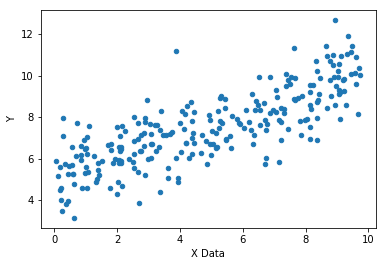

In [11]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

### million rows is too much to pass at once, so we feed data in batches...

In [12]:
batch_size = 16

np.random.randn(2)

array([-1.19391226,  0.59051155])

In [13]:
m = tf.Variable(0.60)
b = tf.Variable(-0.008)

### Steps

1. Create Variables
2. Create Placeholders
3. Define the graph( operations)
4. Loss function
5. Optimizer to reduce the loss 
6. Initialize the variables and run

In [14]:
xph = tf.placeholder(tf.float32,[batch_size])

In [15]:
yph = tf.placeholder(tf.float32,[batch_size])

In [16]:
y_model = m * xph + b    #graph

In [17]:
#we have to reduce this error
#yph = true value where y_model = predicted value

error = tf.reduce_sum(tf.square(yph - y_model))   #loss function  reducesum of (yph - y_model)**2 


In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [19]:
train = optimizer.minimize(error)

In [20]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size= batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m , model_b = sess.run([m,b])

model_m and model_b started off as random variables

In [22]:
model_m


0.57829523

In [23]:
model_b

5.0118833

In [24]:
y_hat= x_data * model_m + model_b

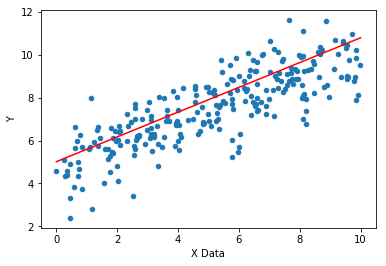

In [25]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

Doing the TEST_TRAIN_SPLIt

# Estimator API ( Keras, Layers, to be used later)

In [42]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [43]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_model_dir': 'C:\\Users\\uday\\AppData\\Local\\Temp\\tmp3_vdajwt'}


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size= 0.3,random_state=101)

In [46]:
print (x_train.shape)

(700000,)


In [47]:
x_eval.shape


(300000,)

In [48]:
# input function    #estimator takes input from numpy or pandas

input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,
                                               batch_size=4,num_epochs=None, shuffle=True)

In [54]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,
                                               batch_size=4,num_epochs=1000, shuffle=False)

In [50]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval,
                                               batch_size=4,num_epochs=1000, shuffle=False)

In [51]:
#here we gave no of epochs for first function
estimator.train(input_fn=input_func,steps=1000)  

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\uday\AppData\Local\Temp\tmp3_vdajwt\model.ckpt.
INFO:tensorflow:step = 1, loss = 216.401
INFO:tensorflow:global_step/sec: 894.201
INFO:tensorflow:step = 101, loss = 8.06944 (0.116 sec)
INFO:tensorflow:global_step/sec: 637.335
INFO:tensorflow:step = 201, loss = 5.62828 (0.155 sec)
INFO:tensorflow:global_step/sec: 820.187
INFO:tensorflow:step = 301, loss = 6.65725 (0.122 sec)
INFO:tensorflow:global_step/sec: 671.555
INFO:tensorflow:step = 401, loss = 3.21106 (0.149 sec)
INFO:tensorflow:global_step/sec: 741.202
INFO:tensorflow:step = 501, loss = 8.45517 (0.135 sec)
INFO:tensorflow:global_step/sec: 820.179
INFO:tensorflow:step = 601, loss = 7.44243 (0.122 sec)
INFO:tensorflow:global_step/sec: 936.776
INFO:tensorflow:step = 701, loss = 6.36431 (0.107 sec)
INFO:tensorflow:global_step/sec: 787.889
INFO:tensorflow:step = 801, loss = 11.7944 (0.127 sec)
INFO:tensorflow:global_step/sec: 844.3
INFO:

In [56]:
#lets get matrix on training data

train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-07-23-03:20:26
INFO:tensorflow:Restoring parameters from C:\Users\uday\AppData\Local\Temp\tmp3_vdajwt\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/10

INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [430/1000]
INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [646/1000]
INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [862/1000]
INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorf

In [61]:
##Test Data

eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-07-23-03:23:55
INFO:tensorflow:Restoring parameters from C:\Users\uday\AppData\Local\Temp\tmp3_vdajwt\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/10

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [59]:
print('TRAINING DATA MATRIX')

print( train_metrics)

TRAINING DATA MATRIX
{'global_step': 1000, 'average_loss': 1.1524125, 'loss': 4.6096501}


In [60]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'global_step': 1000, 'average_loss': 1.1479819, 'loss': 4.5919275}


In [64]:
brand_new_data = np.linspace(0,10,10)


In [66]:

input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data}, 
                                                      shuffle= False)

In [67]:
 estimator.predict(input_fn=input_fn_predict)

<generator object Estimator.predict at 0x000002442FD5B360>

In [74]:
#generator objedct ... to print either iterate or make a list

list (estimator.predict(input_fn=input_fn_predict))  
#it will be a dictionary with key as predications

INFO:tensorflow:Restoring parameters from C:\Users\uday\AppData\Local\Temp\tmp3_vdajwt\model.ckpt-1000


[{'predictions': array([ 4.3135829], dtype=float32)},
 {'predictions': array([ 5.0034318], dtype=float32)},
 {'predictions': array([ 5.6932807], dtype=float32)},
 {'predictions': array([ 6.38312912], dtype=float32)},
 {'predictions': array([ 7.0729785], dtype=float32)},
 {'predictions': array([ 7.76282692], dtype=float32)},
 {'predictions': array([ 8.45267582], dtype=float32)},
 {'predictions': array([ 9.14252472], dtype=float32)},
 {'predictions': array([ 9.83237457], dtype=float32)},
 {'predictions': array([ 10.52222252], dtype=float32)}]

In [75]:
#getting values to plot

predictionss = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictionss.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\uday\AppData\Local\Temp\tmp3_vdajwt\model.ckpt-1000


In [76]:
predictionss

[array([ 4.3135829], dtype=float32),
 array([ 5.0034318], dtype=float32),
 array([ 5.6932807], dtype=float32),
 array([ 6.38312912], dtype=float32),
 array([ 7.0729785], dtype=float32),
 array([ 7.76282692], dtype=float32),
 array([ 8.45267582], dtype=float32),
 array([ 9.14252472], dtype=float32),
 array([ 9.83237457], dtype=float32),
 array([ 10.52222252], dtype=float32)]

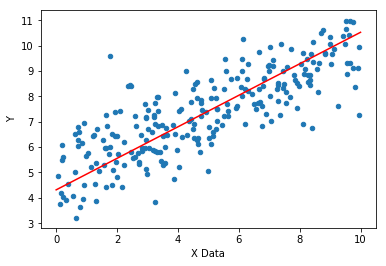

In [82]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data,predictionss,'r')